In [1]:
# Numpy
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

# Pandas
import pandas as pd

# Seaborn
import seaborn as sns

# Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode

# Wordcloud
from wordcloud import WordCloud

# Pil
from PIL import Image

# Json
import json

import warnings

import mlflow

# Emoji
import emoji

import re

import string

warnings.filterwarnings("ignore")

# Sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# NLTK
import nltk
from nltk import ngrams
from nltk.util import trigrams
from nltk.util import bigrams
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
import nlp

# Keras
from keras_preprocessing.sequence import pad_sequences


# Pyldavis
import pyLDAvis
import pyLDAvis.gensim_models

# Collections
import collections

# Itertools
import itertools

# Gensim
import gensim
from gensim import corpora, models, similarities
from gensim.models.coherencemodel import CoherenceModel

# Transformers
from transformers import pipeline
from transformers import DistilBertTokenizerFast

# Torch
import torch
import torch.nn.functional as F

# Image
from IPython.display import Image

# Punctuation
from string import punctuation

# time
import time

# Functions notebook
from functions.functions import *

# <center><a id='loading'>Chargement du dataframe</a></center>

In [2]:
data = pd.read_csv("csv/data_40000.csv")

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
</div>

 # <center><a id='pre-traitement'>Fonction de pré-traitement du jeu de données</a></center>

In [3]:
# data["cleaned_tweet"] = data["tweet"].apply(lambda x: clean_text(x, tokenized=False))
# train['selected_text'] = train['selected_text'].apply(lambda x:clean_text(x))

In [4]:
import gc

gc.collect()

62

# DistilBERT

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import transformers

In [6]:
########################################################################################################################

In [7]:
X=data["tweet"].loc[pd.isna(data["target"])==False]
Y=data["target"].loc[pd.isna(data["target"])==False]

In [8]:
X_train_base, X_test, y_train_base, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [9]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [10]:
train_encodings = tokenizer(X_train_base.to_list(), truncation=True, padding=True, return_tensors='np').data

In [11]:
test_encodings = tokenizer(X_test.to_list(), truncation=True, padding=True, return_tensors='np').data

In [12]:
X_train_ids, X_val_ids, X_train_att, X_val_att, y_train, y_val = train_test_split(train_encodings["input_ids"],train_encodings["attention_mask"], y_train_base, test_size=0.3, random_state=20)

In [13]:
X_train_ids, X_test_ids, X_train_att, X_test_att, y_train, y_test = train_test_split(train_encodings["input_ids"],train_encodings["attention_mask"], y_train_base, test_size=0.3, random_state=20)

In [14]:
# train_encodings = tokenizer(X_train_base.to_list(), truncation=True, padding=True, return_tensors='np').data
# test_encodings = tokenizer(X_test.to_list(), truncation=True, padding=True, return_tensors='np').data

# from transformers import TFDistilBertModel, DistilBertConfig

# DISTILBERT_DROPOUT = 0.2
# DISTILBERT_ATT_DROPOUT = 0.2
 
# # Configure DistilBERT's initialization
# config = DistilBertConfig(dropout=DISTILBERT_DROPOUT, 
#                           attention_dropout=DISTILBERT_ATT_DROPOUT, 
#                           output_hidden_states=True)
                          
# # The bare, pre-trained DistilBERT transformer model outputting raw hidden-states 
# # and without any specific head on top.
# distilBERT = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)

# # Make DistilBERT layers untrainable
# for layer in distilBERT.layers:
#     layer.trainable = False

# MAX_LENGTH = 84
# LAYER_DROPOUT = 0.2
# LEARNING_RATE = 5e-5
# RANDOM_STATE = 42


    
# # Define weight initializer with a random seed to ensure reproducibility
# weight_initializer = tf.keras.initializers.GlorotNormal(seed=RANDOM_STATE) 

# # Define input layers
# input_ids_layer = tf.keras.layers.Input(shape=(max_length,), 
#                                         name='input_ids', 
#                                         dtype='int32')
# input_attention_layer = tf.keras.layers.Input(shape=(max_length,), 
#                                                 name='input_attention', 
#                                                 dtype='int32')

# print(type(input_ids_layer))
# print(type(input_attention_layer))

# # DistilBERT outputs a tuple where the first element at index 0
# # represents the hidden-state at the output of the model's last layer.
# # It is a tf.Tensor of shape (batch_size, sequence_length, hidden_size=768).
# last_hidden_state = transformer([input_ids_layer, input_attention_layer])[0]

# # We only care about DistilBERT's output for the [CLS] token, 
# # which is located at index 0 of every encoded sequence.  
# # Splicing out the [CLS] tokens gives us 2D data.
# cls_token = last_hidden_state[:, 0, :]

# ##                                                 ##
# ## Define additional dropout and dense layers here ##
# ##                                                 ##

# # Define a single node that makes up the output layer (for binary classification)
# output = tf.keras.layers.Dense(1, 
#                                 activation='sigmoid',
#                                 kernel_initializer=weight_initializer,  
#                                 kernel_constraint=None,
#                                 bias_initializer='zeros'
#                                 )(cls_token)

# # Define the model
# model = tf.keras.Model([input_ids_layer, input_attention_layer], output)

# # Compile the model
# model.compile(tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
#                 loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=2.0, from_logits=True), # mettre en comms si marche pas
#                 metrics=['AUC']) ## auc
    



In [15]:
from transformers import TFDistilBertModel, DistilBertConfig

dropout_distillbert = 0.2
attention_distillbert_dropout = 0.2
 
# Configure DistilBERT's initialization
config = DistilBertConfig(dropout=dropout_distillbert, 
                          attention_dropout=attention_distillbert_dropout, 
                          output_hidden_states=True)
                          
# The bare, pre-trained DistilBERT transformer model outputting raw hidden-states 
# and without any specific head on top.
distilbert = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)

# Make DistilBERT layers untrainable
for layer in distilbert.layers:
    layer.trainable = False

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_layer_norm', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [16]:
max_length = 84
learning_rate = 5e-5
random_state = 42

def build_model(transformer, max_length=max_length):
    
    # Define weight initializer with a random seed to ensure reproducibility
    weight_initializer = tf.keras.initializers.GlorotNormal(seed=random_state) 
    
    # Define input layers
    input_ids_layer = tf.keras.layers.Input(shape=(max_length,), 
                                            name='input_ids', 
                                            dtype='int32')
    input_attention_layer = tf.keras.layers.Input(shape=(max_length,), 
                                                  name='input_attention', 
                                                  dtype='int32')
    
    
    # DistilBERT outputs a tuple where the first element at index 0
    # represents the hidden-state at the output of the model's last layer.
    # It is a tf.Tensor of shape (batch_size, sequence_length, hidden_size=768).
    last_hidden_state = transformer([input_ids_layer, input_attention_layer])[0]
    
    # We only care about DistilBERT's output for the [CLS] token, 
    # which is located at index 0 of every encoded sequence.  
    # Splicing out the [CLS] tokens gives us 2D data.
    cls_token = last_hidden_state[:, 0, :]
    
    ##                                                 ##
    ## Define additional dropout and dense layers here ##
    ##                                                 ##
    
    # Define a single node that makes up the output layer (for binary classification)
    output = tf.keras.layers.Dense(1, 
                                   activation='sigmoid',
                                   kernel_initializer=weight_initializer,  
                                   kernel_constraint=None,
                                   bias_initializer='zeros'
                                   )(cls_token)
    
    # Define the model
    model = tf.keras.Model([input_ids_layer, input_attention_layer], output)
    
    # Compile the model
    model.compile(tf.keras.optimizers.Adam(lr=learning_rate), 
                  loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=2.0, from_logits=True), 
                  metrics=['accuracy','AUC']) 
    
    return model

In [17]:
model = build_model(distilbert)

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 84)]         0           []                               
                                                                                                  
 input_attention (InputLayer)   [(None, 84)]         0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  66362880   ['input_ids[0][0]',              
 BertModel)                     ast_hidden_state=(N               'input_attention[0][0]']        
                                one, 84, 768),                                                    
                                 hidden_states=((No                                           

In [19]:
epochs = 10
batch_size = 64

start = time.time()
history = model.fit(
    x = [X_train_ids, X_train_att],
    y = y_train.to_numpy(),
    epochs = epochs,
    batch_size = batch_size,
    validation_data = ([X_val_ids, X_val_att], y_val.to_numpy()),
)
stop = time.time()

Epoch 1/10
1225/1225 [==============================] - 1135s 924ms/step - loss: 0.1616 - accuracy: 0.5024 - auc: 0.5899 - val_loss: 0.1511 - val_accuracy: 0.5027 - val_auc: 0.7172
Epoch 2/10
1225/1225 [==============================] - 1140s 931ms/step - loss: 0.1508 - accuracy: 0.5394 - auc: 0.7022 - val_loss: 0.1439 - val_accuracy: 0.5448 - val_auc: 0.7579
Epoch 3/10
1225/1225 [==============================] - 1142s 932ms/step - loss: 0.1451 - accuracy: 0.5748 - auc: 0.7407 - val_loss: 0.1390 - val_accuracy: 0.5985 - val_auc: 0.7782
Epoch 4/10
1225/1225 [==============================] - 1148s 937ms/step - loss: 0.1424 - accuracy: 0.5978 - auc: 0.7550 - val_loss: 0.1357 - val_accuracy: 0.6202 - val_auc: 0.7920
Epoch 5/10
1225/1225 [==============================] - 1144s 934ms/step - loss: 0.1397 - accuracy: 0.6145 - auc: 0.7673 - val_loss: 0.1330 - val_accuracy: 0.6419 - val_auc: 0.8028
Epoch 6/10
1225/1225 [==============================] - 1147s 936ms/step - loss: 0.1375 - accur

In [20]:
tableau_score = pd.read_csv("csv/tableau_score.csv")

263/263 [==============================] - 296s 1s/step


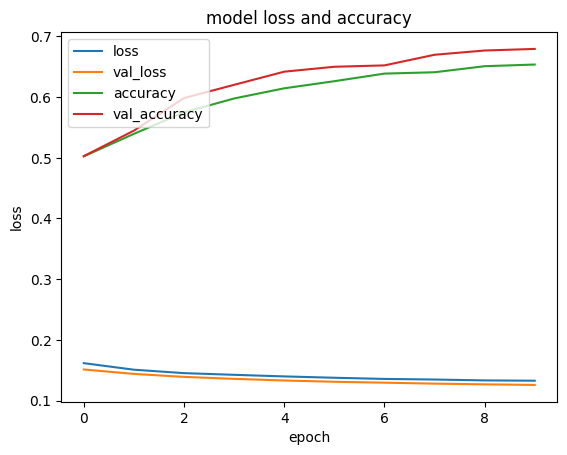

In [21]:
pred_test = model.predict([X_test_ids, X_test_att]).round()
pred_val = model.predict([X_val_ids, X_val_att]).round()

pred_test = np.asarray(pred_test).astype('int64').reshape((-1,1))
pred_val = np.asarray(pred_val).astype('int64').reshape((-1,1))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss and accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'], loc='upper left')
plt.show()

mlflow.log_metric("auc_score_test", roc_auc_score(y_test, pred_test))
mlflow.log_metric("auc_score_val", roc_auc_score(y_val, pred_val))

mlflow.log_metric("f1_score_test", f1_score(y_test, pred_test))
mlflow.log_metric("f1_score_val", f1_score(y_val, pred_val))

mlflow.log_metric("precision_score_test", precision_score(y_test, pred_test))
mlflow.log_metric("precision_score_val", precision_score(y_val, pred_val))

mlflow.log_metric("recall_score_test", recall_score(y_test, pred_test))
mlflow.log_metric("recall_score_val", recall_score(y_val, pred_val))

mlflow.log_metric("fbeta_score_test", fbeta_score(y_test, pred_test, beta=0.5))
mlflow.log_metric("fbeta_score_val", fbeta_score(y_val, pred_val, beta=0.5))

mlflow.log_metric("accuracy_score_test", accuracy_score(y_test, pred_test))
mlflow.log_metric("accuracy_score_val", accuracy_score(y_val, pred_val))

pickle.dump('BERT', open('BERT.pkl', 'wb'))
time_training = stop - start

if type(tableau_score) == type([]):
    tableau_score.append({
        "Nom du modèle" : "BERT",
        "Temps d'entraînement" : time_training,
        "AUC-score_test" : roc_auc_score(y_test, pred_test),
        "AUC-score_val" : roc_auc_score(y_val, pred_val),
        "F1-score_test" : f1_score(y_test, pred_test),
        "F1-score_val" : f1_score(y_val, pred_val),
        "Précision-score_test" : precision_score(y_test, pred_test),
        "Précision-score_val" : precision_score(y_val, pred_val),
        "Rappel-score_test" : recall_score(y_test, pred_test),
        "Rappel-score_val" : recall_score(y_val, pred_val),
        "F-bêta-score_test" : fbeta_score(y_test, pred_test, beta=0.5),
        "F-bêta-score_val" : fbeta_score(y_val, pred_val, beta=0.5),
        "accuracy-score_test" : accuracy_score(y_test, pred_test,),
        "accuracy-score_val" : accuracy_score(y_val, pred_val)
    })

else:
    list = ["BERT", time_training, roc_auc_score(y_test, pred_test), roc_auc_score(y_val, pred_val), 
            f1_score(y_test, pred_test), f1_score(y_val, pred_val),
            precision_score(y_test, pred_test), precision_score(y_val, pred_val), recall_score(y_test, pred_test), recall_score(y_val, pred_val),
            fbeta_score(y_test, pred_test, beta=0.5), fbeta_score(y_val, pred_val, beta=0.5),
            accuracy_score(y_test, pred_test), accuracy_score(y_val, pred_val)]

    tableau_score = tableau_score.append(pd.Series(list, index = ["Nom du modèle", "Temps d'entraînement", "AUC-score_test", "AUC-score_val", 
                                                                    "F1-score_test", "F1-score_val", "Précision-score_test", "Précision-score_val", "Rappel-score_test", 
                                                                    "Rappel-score_val", "F-bêta-score_test", "F-bêta-score_val", 
                                                                    "accuracy-score_test", "accuracy-score_val"]), ignore_index=True)

In [27]:
graph_courbe_roc(model, [X_test_ids, X_test_att], y_test, "Modele LSTM avec Embedding GLOVE Lemmatized")

NameError: name 'graph_courbe_roc' is not defined

              precision    recall  f1-score   support

           0       0.62      0.94      0.75      4179
           1       0.88      0.42      0.57      4221

    accuracy                           0.68      8400
   macro avg       0.75      0.68      0.66      8400
weighted avg       0.75      0.68      0.66      8400



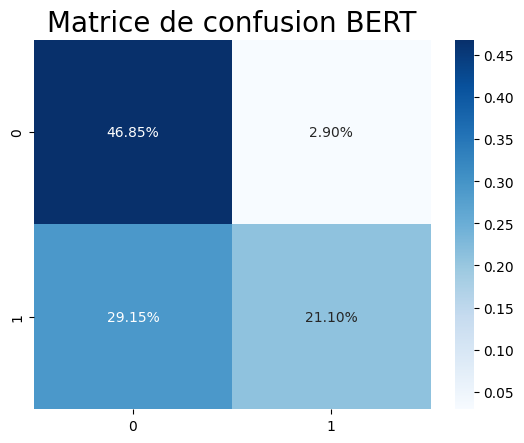

In [26]:
confusion_report_matrix("Matrice de confusion BERT", y_test, pred_test)

In [25]:
tableau_score

,Nom du modèle,Temps d'entraînement,AUC-score_test,AUC-score_val,F1-score_test,F1-score_val,Précision-score_test,Précision-score_val,Rappel-score_test,Rappel-score_val,F-bêta-score_test,F-bêta-score_val,accuracy-score_test,accuracy-score_val
0,Régression Logistique Count Lemmatized,4.860323,0.697500,0.665625,0.701235,0.686217,0.692683,0.646409,0.710000,0.731250,0.697529,0.666078,0.697500,0.665625
1,Régression Logistique Count Stemmed,3.856266,0.687500,0.637500,0.691358,0.658824,0.682927,0.622222,0.700000,0.700000,0.687525,0.637626,0.687500,0.637500
2,Régression Logistique TF-IDF Lemmatized,3.847448,0.707500,0.675000,0.719424,0.704545,0.691244,0.645833,0.750000,0.775000,0.707883,0.676314,0.707500,0.675000
3,Régression Logistique TF-IDF Stemmed,3.674040,0.685000,0.650000,0.695652,0.676301,0.672897,0.629032,0.720000,0.731250,0.685189,0.650430,0.685000,0.650000
4,BERT,11434.142559,0.680709,0.680709,0.568222,0.568222,0.878968,0.878968,0.419806,0.419806,0.721205,0.721205,0.679405,0.679405


In [24]:
# tableau_score.to_csv("csv/tableau_score.csv", index=False) 

### <center>Transformer les variables pertinentes pour un modèle supervisé classique (= feature engineering)</center>
<br>

<li style="text-align: right; list-style-type: none"><strong>Terminé ✅</strong></li><li style="text-align: right; list-style-type: none"><strong>Non terminé ❌</strong></li>

**Entraîner un modèle Deep Learning sur des données textuelles :**

* ❌ CE1 Le candidat a défini sa stratégie d’élaboration d’un modèle pour répondre à un besoin métier (par exemple : choix de conception d’un modèle ou ré-utilisation de modèles pré-entraînés).

* ✅ CE2 Le candidat a identifié la ou les cibles. 

* ✅ CE3 Le candidat a réalisé la séparation du jeu de données en jeu d’entraînement, jeu de validation et jeu de test. 

* ✅ CE4 Le candidat s'est assuré qu'il n’y a pas de fuite d’information entre les deux jeux de données (entraînement, validation et test). 

* ❌ CE5 Le candidat a testé plusieurs modèles d’apprentissage profond en partant du plus simple vers les plus complexes :  
    dont au moins un modèle Tensorflow/Keras de base avec embedding, un modèle Tensorflow/Keras avec embedding et couche LSTM, ainsi qu’un modèle BERT.    
    
* ❌ CE6 Le candidat a mis en oeuvre des modèles à partir de modèles pré-entraînés (technique de Transfer Learning)

**Choisir la méthode de plongement de mots pertinente pour un modèle de Deep Learning :**

* ❌ CE1 Le candidat, en complément de la démarche de type “bag-of-words”, a mis en oeuvre 3 démarches de word/sentence embedding : Word2Vec (ou Doc2Vec ou Glove ou FastText), BERT, et USE (Universal Sentence Encoder) :  
    * Au moins deux méthodes d’embedding ont été testées (parmi word2vec, Glove, fasttext) pour les “modèles avancés” Tensorflow/Keras.
    * Les données sont préparées (input ids, attention mask) pour mettre en oeuvre une démarche d’embedding pour le “modèle BERT”
    * Une démarche optionnelle d’embedding via USE est mise en oeuvre


**Sélectionner les méthodes de prétraitement du texte pour un modèle de Deep Learning :**

* ✅ CE1 Au moins deux techniques de prétraitement du texte ont été testées (ex : lemmatization, stemming…)


**Évaluer la performance d’un modèle de Deep Learning sur des données textuelles**

* ❌ CE1 Le candidat a choisi une métrique adaptée à la problématique métier, et sert à évaluer la performance des modèles 

* ❌ CE2 Le candidat a explicité le choix de la métrique d’évaluation 

* ❌ CE3 Le candidat a évalué la performance d’un modèle de référence et sert de comparaison pour évaluer la performance des modèles plus complexes 

* ❌ CE4 Le candidat a calculé, hormis la métrique choisie, au moins un autre indicateur pour comparer les modèles (par exemple : le temps nécessaire pour l’entraînement du modèle)

* ❌ CE5 Le candidat a optimisé au moins un des hyperparamètres du modèle choisi (par exemple : le choix de la fonction Loss, le Batch Size, le nombre d'Epochs) 

* ❌ CE6 Le candidat a présenté une synthèse comparative des différents modèles, par exemple sous forme de tableau. 


**Définir et mettre en œuvre un pipeline d’entraînement des modèles, avec centralisation du stockage des modèles et formalisation des résultats et mesures des différentes expérimentations réalisées, afin d’industrialiser le projet de Machine Learning :**

* ❌ CE1 Le candidat a mis en oeuvre un pipeline d’entraînement des modèles reproductible

* ❌ CE2 Le candidat a sérialisé et stocké les modèles créés dans un registre centralisé afin de pouvoir facilement les réutiliser.

* ❌ CE3 Le candidat a formalisé des mesures et résultats de chaque expérimentation, afin de les analyser et de les comparer.

**Mettre en œuvre un logiciel de version de code afin d’assurer en continu l’intégration et la diffusion du modèle auprès de collaborateurs. :**

* ❌ CE1 Le candidat a créé un dossier contenant tous les scripts du projet dans un logiciel de version de code (ex : Git) et l'a partagé (ex : Github). 

* ❌ CE2 Le candidat a présenté un historique des modifications du projet qui affiche au moins trois versions distinctes, auxquelles il est possible d'accéder.

* ❌ CE3 Le candidat a tenu à jour et mis à disposition la liste des packages utilisés ainsi que leur numéro de version.

* ❌ CE4 Le candidat a rédigé un fichier introductif permettant de comprendre l'objectif du projet et le découpage des dossiers.  

* ❌ CE5 Le candidat a commenté les scripts et les fonctions facilitant une réutilisation du travail par d'autres personnes et la collaboration. 


**Concevoir et assurer un déploiement continu d'un moteur d’inférence (modèle de prédiction encapsulé dans une API) sur une plateforme Cloud afin de permettre à des applications de réaliser des prédictions via une requête à l’API :**

* ❌ CE1 Le candidat a défini et préparé un pipeline de déploiement continu.

* ❌ CE2 Le candidat a déployé le modèle de machine learning sous forme d'API (via Flask par exemple) et cette API renvoie bien une prédiction correspondant à une demande. 

* ❌ CE3 Le candidat a mis en œuvre un pipeline de déploiement continu, afin de déployer l'API sur un serveur d'une plateforme Cloud. 

* ❌ CE4 Le candidat a mis en oeuvre des tests unitaires automatisés (par exemple avec pyTest).

* ❌ CE5 Le candidat a réalisé l'API indépendamment de l'application qui utilise le résultat de la prédiction.


**Rédiger une note méthodologique contenant notamment le choix des algorithmes testés, les métriques utilisées et l’interprétabilité du modèle proposé, afin de communiquer sa démarche de modélisation :**

* ❌ CE1 Le candidat a présenté la démarche de modélisation de manière synthétique dans une note. 

* ❌ CE2 Le candidat a explicité la métrique d'évaluation retenue et sa démarche d'optimisation. 

* ❌ CE3 Le candidat a explicité l'interprétabilité globale et locale du modèle. 

* ❌ CE4 Le candidat a décrit les limites et les améliorations envisageables pour gagner en performance et en interprétabilité de l'approche de modélisation



**Réaliser la présentation orale d’une démarche de modélisation à un client interne/externe afin de partager les résultats et faciliter la prise de décision de l'interlocuteur :**

* ❌ CE1 Le candidat a expliqué de manière compréhensible par un public non technique la méthode d'évaluation de la performance du modèle de machine learning, la façon d'interpréter les résultats du modèle, et la façon d'interpréter l'importance des variables du modèle. 

* ❌ CE2 Le candidat a su répondre de manière simple (compréhensible par un public non technique) à au moins une question portant sur sa démarche de modélisation.

* ❌ CE3 Le candidat a présenté une démarche de modélisation et une évaluation complète des modèles, en particulier la comparaison de plusieurs modèles

* Évaluer la performance d’un modèle de Deep Learning sur des données textuelles

* Sélectionner les méthodes de prétraitement du texte pour un modèle de Deep Learning

* Choisir la méthode de plongement de mots pertinente pour un modèle de Deep Learning

* Mettre en œuvre un logiciel de version de code

* Définir et mettre en œuvre un pipeline d’entraînement des modèles

* Rédiger une note méthodologique afin de communiquer sa démarche de modélisation

* Entraîner un modèle Deep Learning sur des données textuelles

* Réaliser la présentation orale d’une démarche de modélisation

* Concevoir et assurer un déploiement continu d'un moteur d’inférence dans le Cloud
